<a href="https://colab.research.google.com/github/widenscn/exam_20221027/blob/main/20221027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog

##이미지를 읽어들이고 크기를 변경하고 hog 계산

In [49]:
url = 'http://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []

for i in range(15):
  file = url + 'img{0:02d}.jpg'.format(i+1)
  img = imread(file)
  img = resize(img, (64, 64))
  face_images.append(img)

<Figure size 432x288 with 0 Axes>

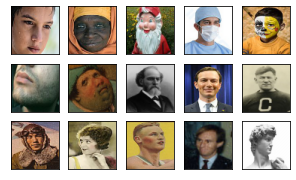

In [50]:
def plot_images(nRow, nCol, img):
  fig = plt.figure()
  fig, ax = plt.subplots(nRow, nCol, figsize = (nCol, nRow))
  for i in range(nRow):
    for j in range(nCol):
      if nRow <= 1: axis = ax[j]
      else: axis = ax[i,j]
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      axis.imshow(img[i*nCol+j])


plot_images(3,5, face_images)

##face_image 배열에 존재하는 이미지들을 확인하지 위한 맷플롯립 이용
##이미지 그대로 입력 데이터로 사용하는 것은 별로 바람직하지않음

<Figure size 432x288 with 0 Axes>

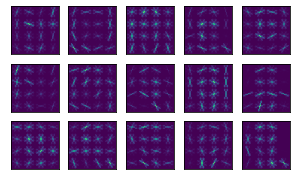

In [51]:
face_hogs = []
face_features = []

for i in range(15):
  hog_desc, hog_image = hog(face_images[i], orientations= 8,
                            pixels_per_cell = (16, 16), cells_per_block = (1,1),
                            visualize = True, multichannel = True)
  face_hogs.append(hog_image)
  face_features.append(hog_desc)

plot_images(3, 5, face_hogs)

##기울기 히스토그램 사용-> 얼굴 이미지의 중요 특징만을 추출
##이미지 입력시 orientation에 지정된 수만큼의 방향으로 나누어 각 방향의 빈도 계산-> 이미지를 히스토그램 이미지로 가시화하는 코드

In [52]:
print(face_features[0].shape)

(128,)


<Figure size 432x288 with 0 Axes>

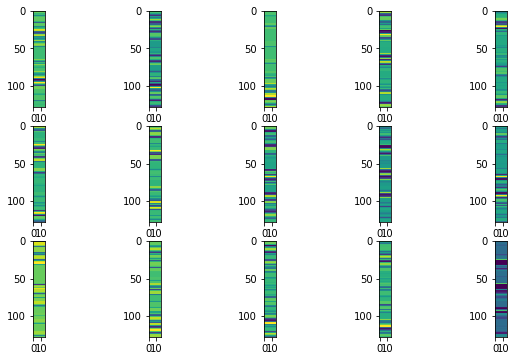

In [53]:
fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize = (10, 6))
for i in range(3):
  for j in range(5):
    ax[i, j].imshow( resize(face_features[i*5+j], (128,16)))

##1차원 백터, 128*1의 이미지로 표현 = 각 이미지를 설명하는 특징백터

사람의 얼굴 이미지로 특징 데이터 

<Figure size 432x288 with 0 Axes>

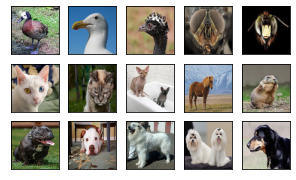

In [54]:
url = 'http://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []

for i in range(15):
  file = url + 'img{0:02d}.jpg'.format(i+1)
  img = imread(file)
  img = resize(img, (64, 64))
  animal_images.append(img)

plot_images(3, 5, animal_images)

##링크 내의 동물 사진 가져오기

<Figure size 432x288 with 0 Axes>

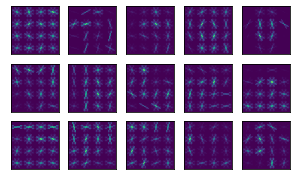

In [55]:
animal_hogs = []
animal_features = []

for i in range(15):
  hog_desc, hog_image = hog(animal_images[i], orientations= 8,
                            pixels_per_cell = (16, 16), cells_per_block = (1,1),
                            visualize = True, multichannel = True)
  animal_hogs.append(hog_image)
  animal_features.append(hog_desc)

plot_images(3, 5, animal_hogs)

<Figure size 432x288 with 0 Axes>

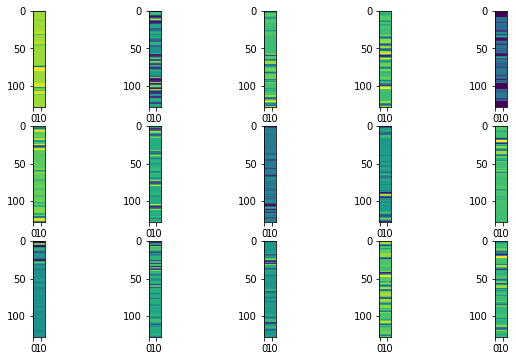

In [56]:
fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize = (10, 6))
for i in range(3):
  for j in range(5):
    ax[i, j].imshow( resize(animal_features[i*5+j], (128,16)))

##1차원 백터, 128*1의 이미지로 표현 = 각 이미지를 설명하는 특징백터

In [57]:
X, y = [],[]

for feature in face_features:
  X.append(feature)
  y.append(1)
for feature in animal_features:
  X.append(feature)
  y.append(0)

print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [58]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polynomial_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=1, kernel = 'poly', degree = 5, coef0 = 10.0))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=10.0, degree=5, kernel='poly'))])

In [59]:
yhat = polynomial_svm_clf.predict(X)
print(yhat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<Figure size 432x288 with 0 Axes>

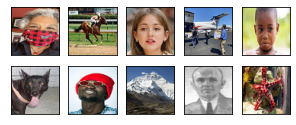

In [60]:
url = 'http://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []

for i in range(10):
  file = url + 'img{0:02d}.jpg'.format(i+1)
  img = imread(file)
  img = resize(img, (64, 64))
  test_images.append(img)

plot_images(2, 5, test_images)


In [61]:
test_features = []
for i in range(10):
  hog_desc, hog_image = hog(test_images[i],orientations = 8,
                            pixels_per_cell= (16, 16), cells_per_block= (1,1),
                            visualize = True, multichannel = True)
  test_features.append(hog_desc)

test_result = polynomial_svm_clf.predict(test_features)
print(test_result)

[1 0 1 0 0 0 0 0 1 0]


<Figure size 432x288 with 0 Axes>

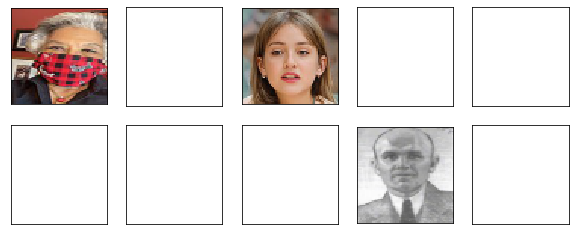

In [65]:
fig = plt.figure()
fig, ax = plt.subplots(2, 5, figsize = (10, 4))
for i in range(2):
  for j in range(5):
    ax[i,j].get_xaxis().set_visible(False)
    ax[i,j].get_yaxis().set_visible(False)
    if test_result[i*5+j] == 1:
      ax[i, j].imshow(test_images[i*5+j], interpolation ='nearest')